In [1]:
import sys
import os

# Add repo root to Python path (one level up from examples/)
sys.path.append(os.path.abspath(".."))  

from src.parsing import *
from CRN_Simulation.CRN import CRN

import numpy as np
import random

In [2]:
# Define species names
species_names = ["X", "Y", "Z"]

# Define complexes (example: bi-molecular)
complexes = np.array([
    [0, 1, 0, 0, 2, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 2, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 2, 0, 1, 1]
])


reactant_matrix, product_matrix, stoichiometric_matrix, reaction_names, parameter_names = generate_reactions(complexes, species_names)
print(f"Total reactions generated: {len(reaction_names)}")
print("Some reaction names:", reaction_names[:5])


Total reactions generated: 90
Some reaction names: ['Empty_to_X:', 'Empty_to_Y:', 'Empty_to_Z:', 'Empty_to_2X:', 'Empty_to_2Y:']


In [3]:
# Number of reactions to sample
N = 3
alpha, beta = 2.6, 0.4

(CRN_stoichiometric_matrix, CRN_reaction_names, CRN_parameter_names,
 CRN_propensities, parameter_values, sampled_indices) = sample_reactions(
    reactant_matrix, product_matrix, stoichiometric_matrix,
    reaction_names, parameter_names,
    species_names=species_names,
    N=N, alpha=alpha, beta=beta, seed=42
)

print("Sampled reactions:")
for name, param in zip(CRN_reaction_names, CRN_parameter_names):
    print(f"{param}: {name}")


rn = CRN(species_names=species_names,
         stoichiometric_matrix=CRN_stoichiometric_matrix,
         parameters_names=CRN_parameter_names,
         reaction_names=CRN_reaction_names,
         propensities=CRN_propensities)

print("CRN object created.")
print("Parameter values:", parameter_values)

Sampled reactions:
k81: Y+Z_to_Empty:
k14: X_to_2Z:
k3: Empty_to_2X:
CRN object created.
Parameter values: {'k81': 1.2398995208507477, 'k14': 0.8259243249147579, 'k3': 0.7728393055851849}


Initial state: {'X': np.int64(7), 'Y': np.int64(4), 'Z': np.int64(8)}
Trajectory saved to ../data/example3_trajectory.json


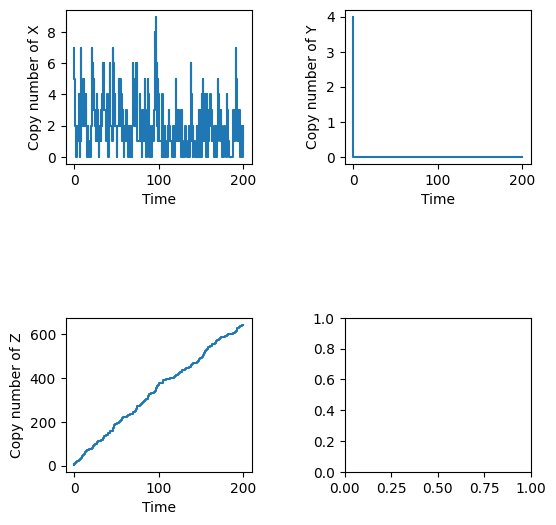

In [4]:
data_dir = "../data"  # relative to examples/ folder
os.makedirs(data_dir, exist_ok=True)

# Generate trajectory
time_list, state_list = generate_single_trajectory(
    rn,
    parameter_values,
    species_names,
    finalTime=200,   # adjust as needed
    minVal=1,
    maxVal=10,
    seed=42          # for reproducibility
)

# Save trajectory to JSON
trajectory_file = os.path.join(data_dir, "example3_trajectory.json")
save_trajectory(time_list, state_list, filename=trajectory_file)

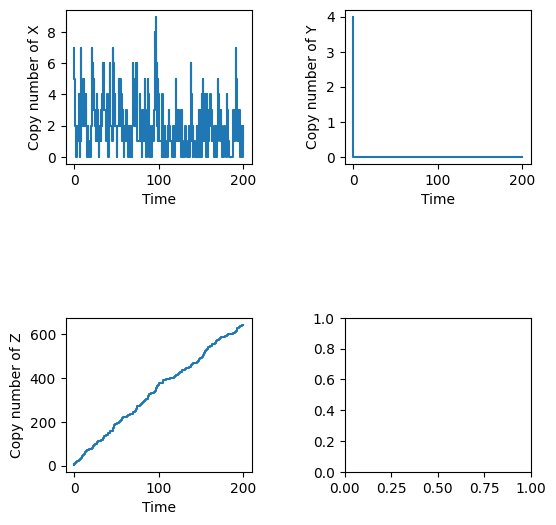

In [5]:
trajectory_file_new = "../data/example3_trajectory.json"
time_list_new, state_list_new = load_trajectory(trajectory_file_new)
rn.plot_trajectories(time_list, state_list)


In [6]:
[col_dict, XCurrKeys, X_Counts, T_Vals, X_Propensities] = calc_XCurr_ChangeTimePropensitySimple(state_list, time_list, 
                                                                                                reactant_matrix, stoichiometric_matrix)

Wrapped single trajectory into list of trajectories.
Tracking data for 54 unique stoichiometric changes
Processing trajectory 1 of 1
	Processing state 0 of 482
Finished processing states. Computing propensities...
	Processing propensities for state 0 = (7, 4, 8)
Finished successfully.


In [7]:
time_list[0:10]

[0,
 np.float64(0.011097811874413189),
 np.float64(0.06810330478021509),
 np.float64(0.07480634651665741),
 np.float64(0.10187345475689061),
 np.float64(0.106534837828003),
 np.float64(0.3770422556434983),
 np.float64(0.7230034276682743),
 np.float64(0.8811820793606082),
 np.float64(1.2606936273142046)]

In [8]:
state_list[0:10]

[array([7., 4., 8.]),
 array([7., 3., 7.]),
 array([7., 2., 6.]),
 array([7., 1., 5.]),
 array([7., 0., 4.]),
 array([6., 0., 6.]),
 array([5., 0., 8.]),
 array([ 4.,  0., 10.]),
 array([ 3.,  0., 12.]),
 array([ 2.,  0., 14.])]